<a href="https://colab.research.google.com/github/saishree2004/Machine-learning/blob/main/MLlab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
# Generate 500 data points with 4 distinct clusters
X, y_true = make_blobs(n_samples=500,      # number of samples
                       centers=4,          # number of clusters
                       cluster_std=1.0,    # standard deviation (spread)
                       random_state=42)    # for reproducibility


In [17]:
# Standardize features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
# Create and fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


In [19]:
# Silhouette Score measures how well points are clustered (-1 to 1)
score = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.80


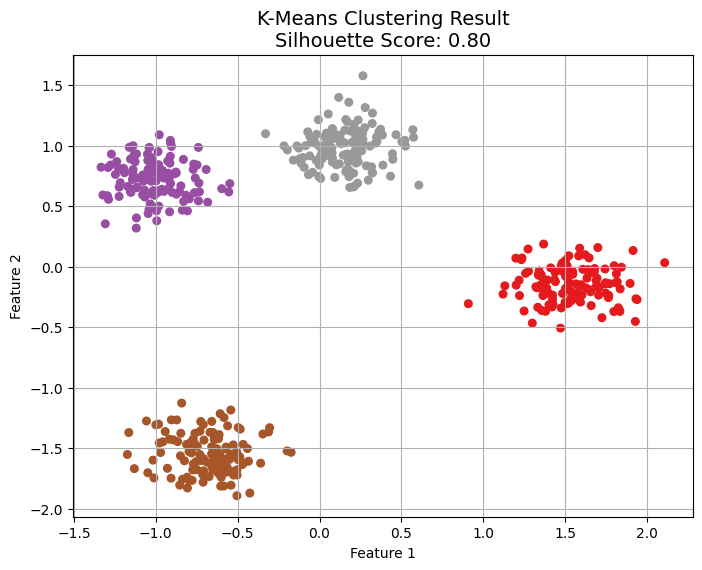

In [20]:
# Scatter plot of the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='Set1', s=30)
plt.title(f'K-Means Clustering Result\nSilhouette Score: {score:.2f}', fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [22]:
# Create 500 samples of moon-shaped data with some noise
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)


In [23]:
# Standardize features (mean=0, variance=1) for better DBSCAN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
# Initialize DBSCAN with radius eps=0.3 and minimum samples=5
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit and predict cluster labels
dbscan_labels = dbscan.fit_predict(X_scaled)


In [25]:
# Calculate silhouette score only if more than one cluster is found
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    # Exclude noise points (label = -1) for silhouette calculation
    mask = dbscan_labels != -1
    score = silhouette_score(X_scaled[mask], dbscan_labels[mask])
elif len(set(dbscan_labels)) > 1:
    score = silhouette_score(X_scaled, dbscan_labels)
else:
    score = -1  # Invalid silhouette score (e.g., single cluster)

print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.39


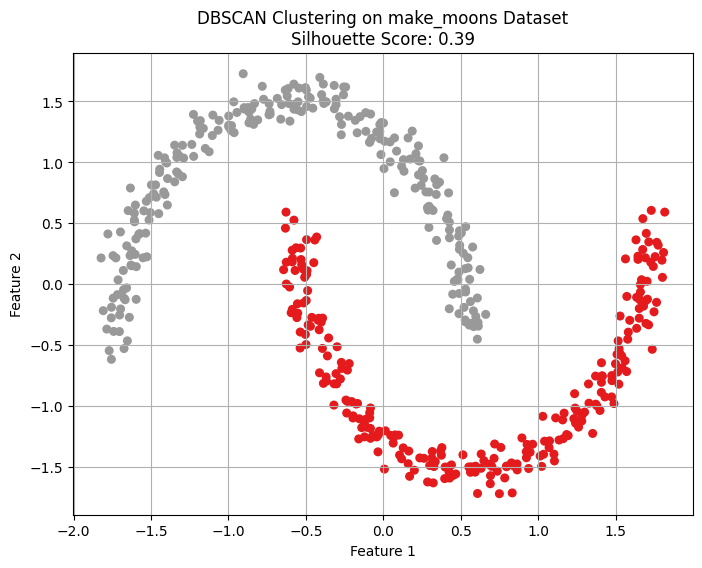

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='Set1', s=30)
plt.title(f'DBSCAN Clustering on make_moons Dataset\nSilhouette Score: {score:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score




In [28]:
# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

In [29]:
# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Step 3: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)

In [31]:
# Step 4: Calculate silhouette score
score = silhouette_score(X_scaled, agglo_labels)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.80


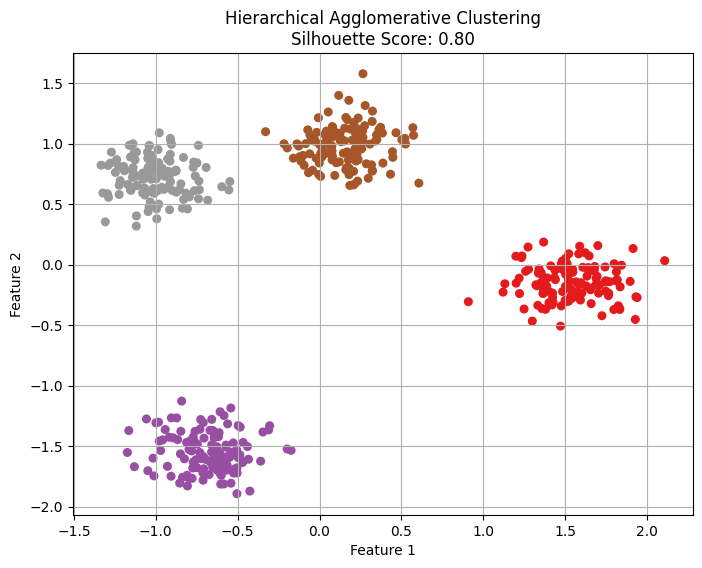

In [32]:
# Step 5: Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='Set1', s=30)
plt.title(f'Hierarchical Agglomerative Clustering\nSilhouette Score: {score:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()
